## Imports

In [8]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

## Load data

In [9]:
data = pd.read_csv('191209-2-1_results.csv')
info = pd.read_csv('sample_info.csv')
merged = data.merge(info, on='Accession')
merged = merged.replace({'None': 'No Spin'})
merged['Description'] =  merged['centrifugation'] + ", " + merged['sample'] + ", " + 'Pool ' + merged['Pool replicate'].astype(str)
merged.head()

,Accession,total_reads,t7_reads,t7_normalized_reads,ecoli_reads,ecoli_normalized_reads,Human,Bacteria,Virus,Parasite,Fungus,Unclassified,Pool,Pool replicate,sample,centrifugation,Description
0,IDBD-D100970,3487466,683,1958.442032,21294,61058.659783,2.070661e+06,5706.148820,246843.983569,197.851391,48.745995,7.676542e+06,3,3A,No DNAse,No Spin,"No Spin, No DNAse, Pool 3A"
1,IDBD-D100971,3879592,707,1822.356578,23181,59751.128469,2.075589e+06,5263.440073,240605.197660,213.940023,28.353497,7.678300e+06,3,3B,No DNAse,No Spin,"No Spin, No DNAse, Pool 3B"
2,IDBD-D100972,4178284,805,1926.628252,35726,85504.001164,2.008813e+06,6117.343867,274734.795433,244.119356,19.146616,7.710072e+06,4,4A,No DNAse,No Spin,"No Spin, No DNAse, Pool 4A"
3,IDBD-D100973,2849723,484,1698.410688,22530,79060.315687,2.084146e+06,5733.890627,262888.708832,245.637909,17.545565,7.646968e+06,4,4B,No DNAse,No Spin,"No Spin, No DNAse, Pool 4B"
4,IDBD-D100974,2732588,2433,8903.647385,60304,220684.567158,3.310634e+05,13895.252413,642079.962292,21.957207,76.850224,9.012863e+06,3,3A,DNAse,No Spin,"No Spin, DNAse, Pool 3A"


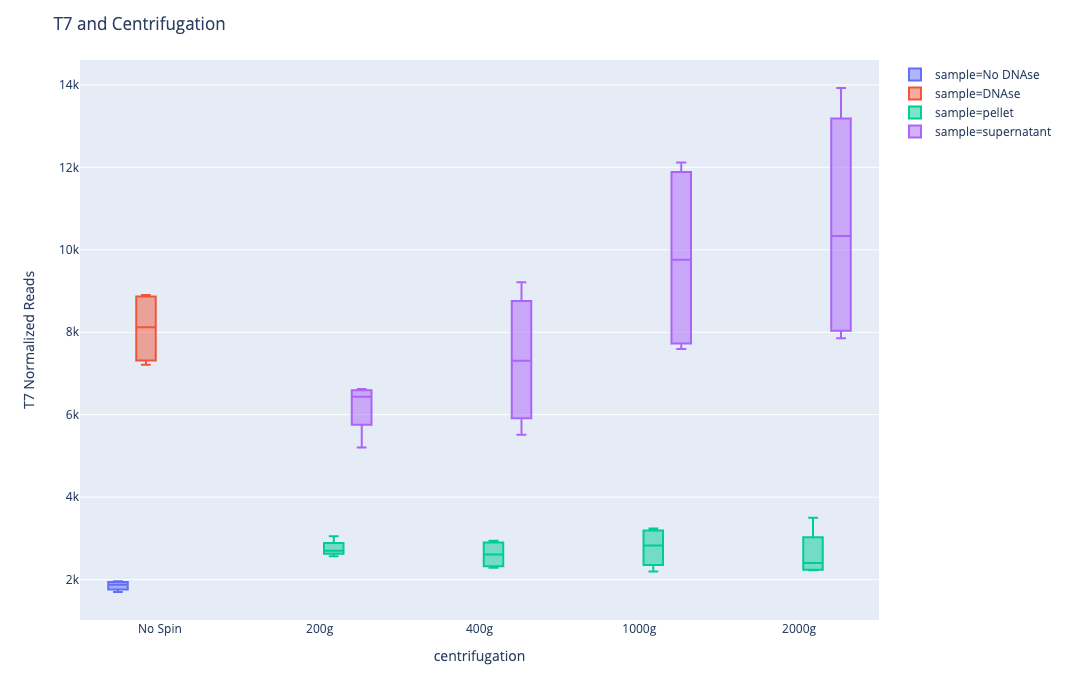

In [10]:
fig_t7 = px.box(merged, x='centrifugation', y='t7_normalized_reads', color='sample', labels={'t7_normalized_reads': 'T7 Normalized Reads'})
fig_t7.update_layout(height=700, title='T7 and Centrifugation')
fig_t7.show()

In [14]:
merged.columns

Index(['Accession', 'total_reads', 't7_reads', 't7_normalized_reads',
       'ecoli_reads', 'ecoli_normalized_reads', 'Human', 'Bacteria', 'Virus',
       'Parasite', 'Fungus', 'Unclassified', 'Pool', 'Pool replicate',
       'sample', 'centrifugation', 'Description'],
      dtype='object')

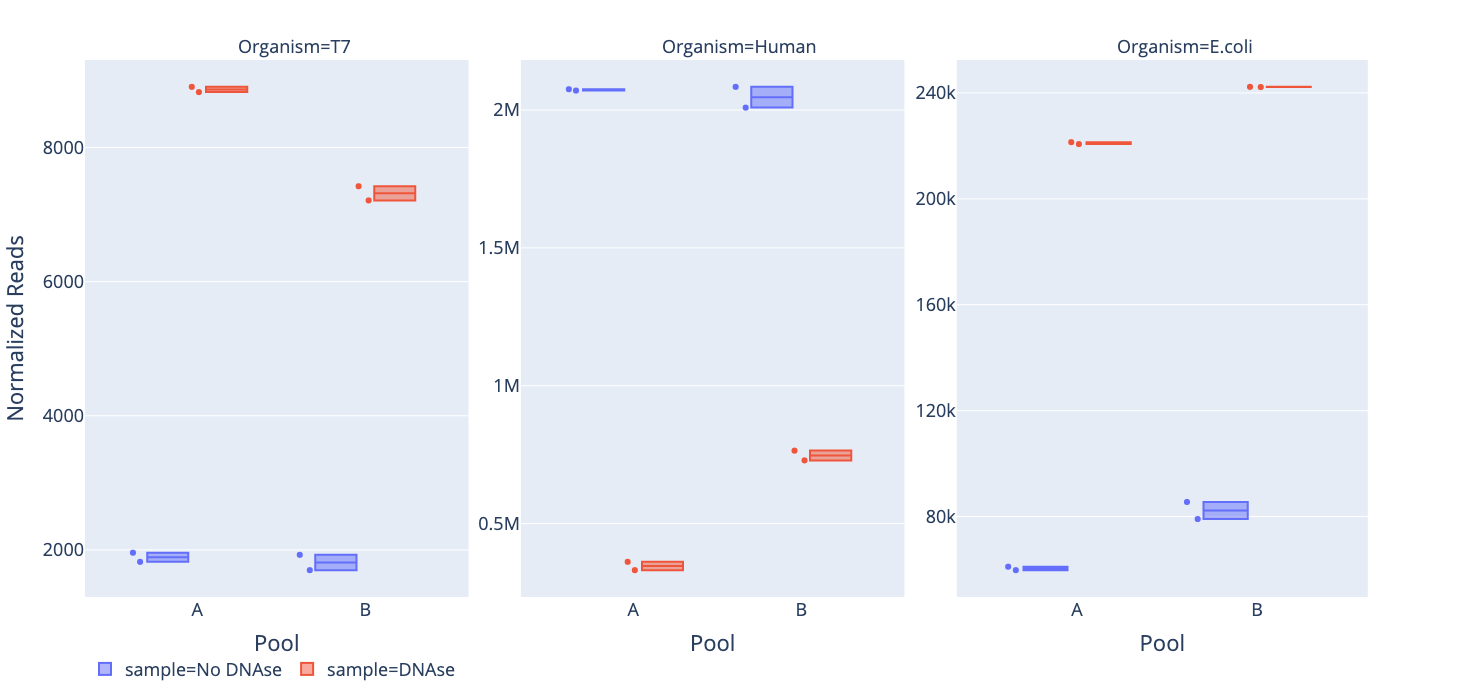

In [76]:
melt = pd.melt(
    merged[merged['sample'].isin(['No DNAse', 'DNAse'])],
    value_vars=['t7_normalized_reads', 'Human', 'ecoli_normalized_reads'],
    id_vars=['Accession', 'sample', 'Pool'],
    value_name='Normalized Reads',
    var_name='Organism'
)
melt = melt.replace({
    't7_normalized_reads': 'T7',
    'ecoli_normalized_reads': 'E.coli'
})
melt['Pool'] = melt['Pool'].replace({3: 'A', 4: 'B'})
fig = px.box(melt, facet_col='Organism', x='Pool', y='Normalized Reads', color='sample', points='all', hover_data=['Accession'],
             labels={3: 'A', 4: 'B'})
fig.update_layout(height=700, font=dict(size=18), legend_orientation='h')
fig.layout.yaxis1.update(matches=None, tick0=2e3, dtick=2e3)
fig.layout.yaxis2.update(matches=None, showticklabels=True, tick0=5e5, dtick=0.5e6)
fig.layout.yaxis3.update(matches=None, showticklabels=True, tick0=80e3, dtick=40e3)
fig.layout.xaxis.update(domain=[0, 0.293])
fig.layout.xaxis2.update(domain=[0.333, 0.626])
fig.layout.xaxis3.update(domain=[0.666, 0.98])
fig.show()

In [42]:
merged['Accession'].unique()

array(['IDBD-D100970', 'IDBD-D100971', 'IDBD-D100972', 'IDBD-D100973',
       'IDBD-D100974', 'IDBD-D100975', 'IDBD-D100976', 'IDBD-D100977',
       'IDBD-D100978', 'IDBD-D100979', 'IDBD-D100980', 'IDBD-D100981',
       'IDBD-D100982', 'IDBD-D100983', 'IDBD-D100984', 'IDBD-D100985',
       'IDBD-D100986', 'IDBD-D100987', 'IDBD-D100988', 'IDBD-D100989',
       'IDBD-D100990', 'IDBD-D100991', 'IDBD-D100992', 'IDBD-D100993',
       'IDBD-D100994', 'IDBD-D100995', 'IDBD-D100996', 'IDBD-D100997',
       'IDBD-D100998', 'IDBD-D100999', 'IDBD-D101000', 'IDBD-D101001',
       'IDBD-D101002', 'IDBD-D101003', 'IDBD-D101004', 'IDBD-D101005',
       'IDBD-D101006', 'IDBD-D101007', 'IDBD-D101008', 'IDBD-D101009'],
      dtype=object)

In [41]:
merged.columns

Index(['Accession', 'total_reads', 't7_reads', 't7_normalized_reads',
       'ecoli_reads', 'ecoli_normalized_reads', 'Human', 'Bacteria', 'Virus',
       'Parasite', 'Fungus', 'Unclassified', 'Pool', 'Pool replicate',
       'sample', 'centrifugation', 'Description'],
      dtype='object')

In [ ]:
merged['sample'].uique()

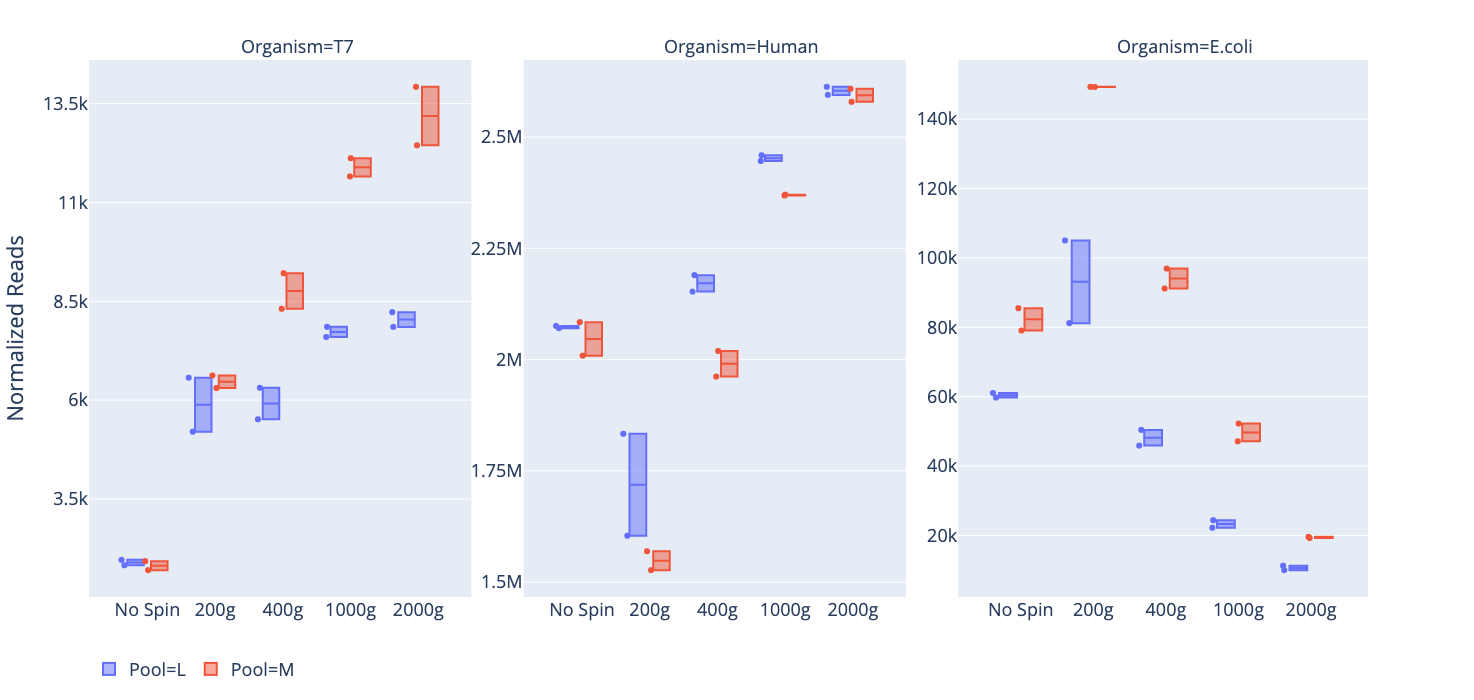

In [89]:
melt = pd.melt(
    merged[merged['sample'].isin(['No DNAse', 'supernatant'])],
    value_vars=['t7_normalized_reads', 'Human', 'ecoli_normalized_reads'],
    id_vars=['Accession', 'centrifugation', 'Pool'],
    value_name='Normalized Reads',
    var_name='Organism',
)
melt = melt.replace({
    't7_normalized_reads': 'T7',
    'ecoli_normalized_reads': 'E.coli',
    3: 'L',
    4: 'M'
})
# fig = px.box(melt[melt['Pool'] == 4], facet_col='Organism', y='Normalized Reads', x='centrifugation', hover_data=['Accession'], points='all')
fig = px.box(melt, facet_col='Organism', y='Normalized Reads', x='centrifugation', hover_data=['Accession'], points='all', color='Pool')
fig.update_layout(height=700, font=dict(size=18), legend_orientation='h')
fig.update_xaxes(title=None)
fig.layout.yaxis.update(matches=None, tick0=1e3, dtick=2.5e3)
fig.layout.yaxis2.update(matches=None, showticklabels=True, tick0=1.5e6, dtick=0.25e6)
fig.layout.yaxis3.update(matches=None, showticklabels=True, tick0=60e3, dtick=20e3)
fig.layout.xaxis.update(domain=[0, 0.293])
fig.layout.xaxis2.update(domain=[0.333, 0.626])
fig.layout.xaxis3.update(domain=[0.666, 0.98])
fig.show()

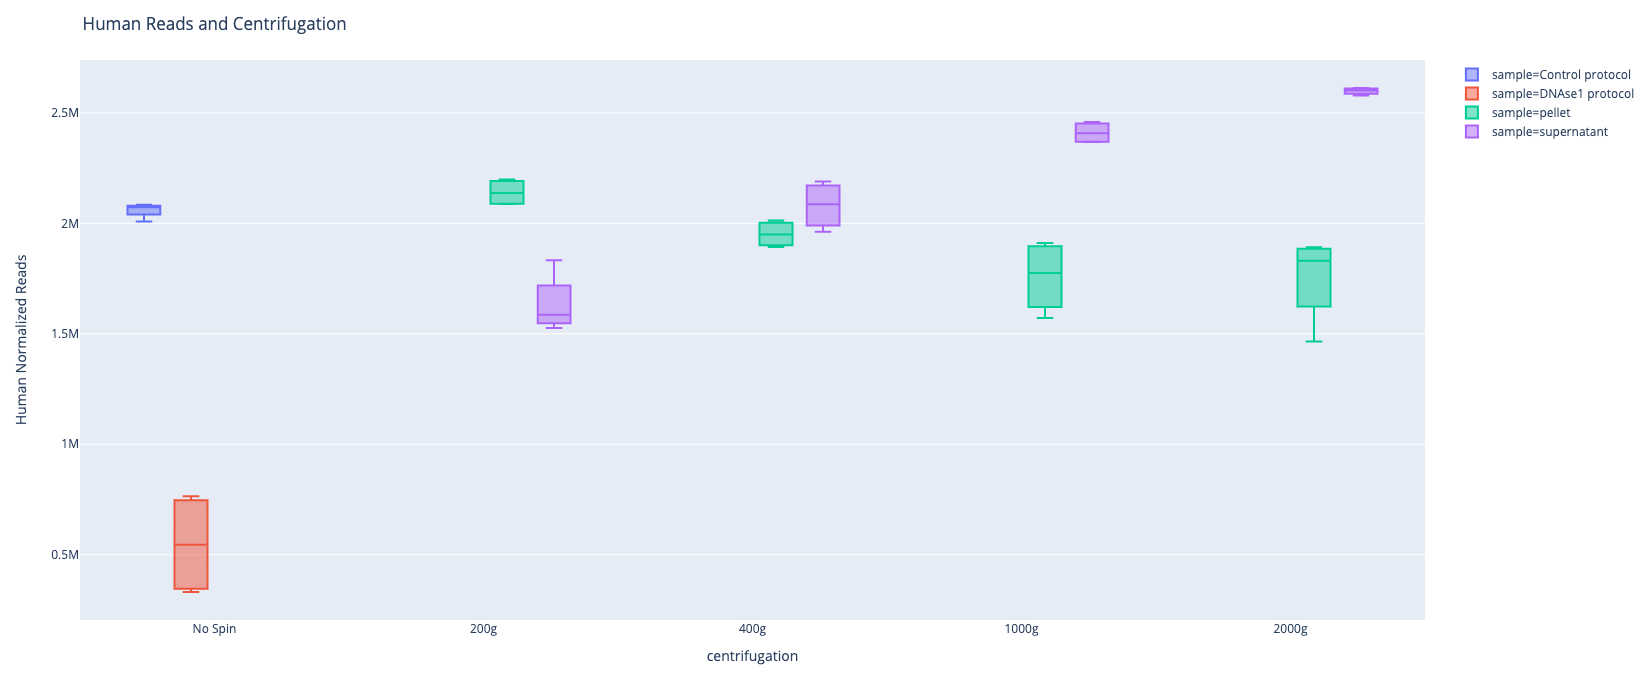

In [4]:
fig_t7 = px.box(merged, x='centrifugation', y='Human', color='sample',
                labels={'Human': 'Human Normalized Reads'})
fig_t7.update_layout(height=700, title='Human Reads and Centrifugation')
fig_t7.show()

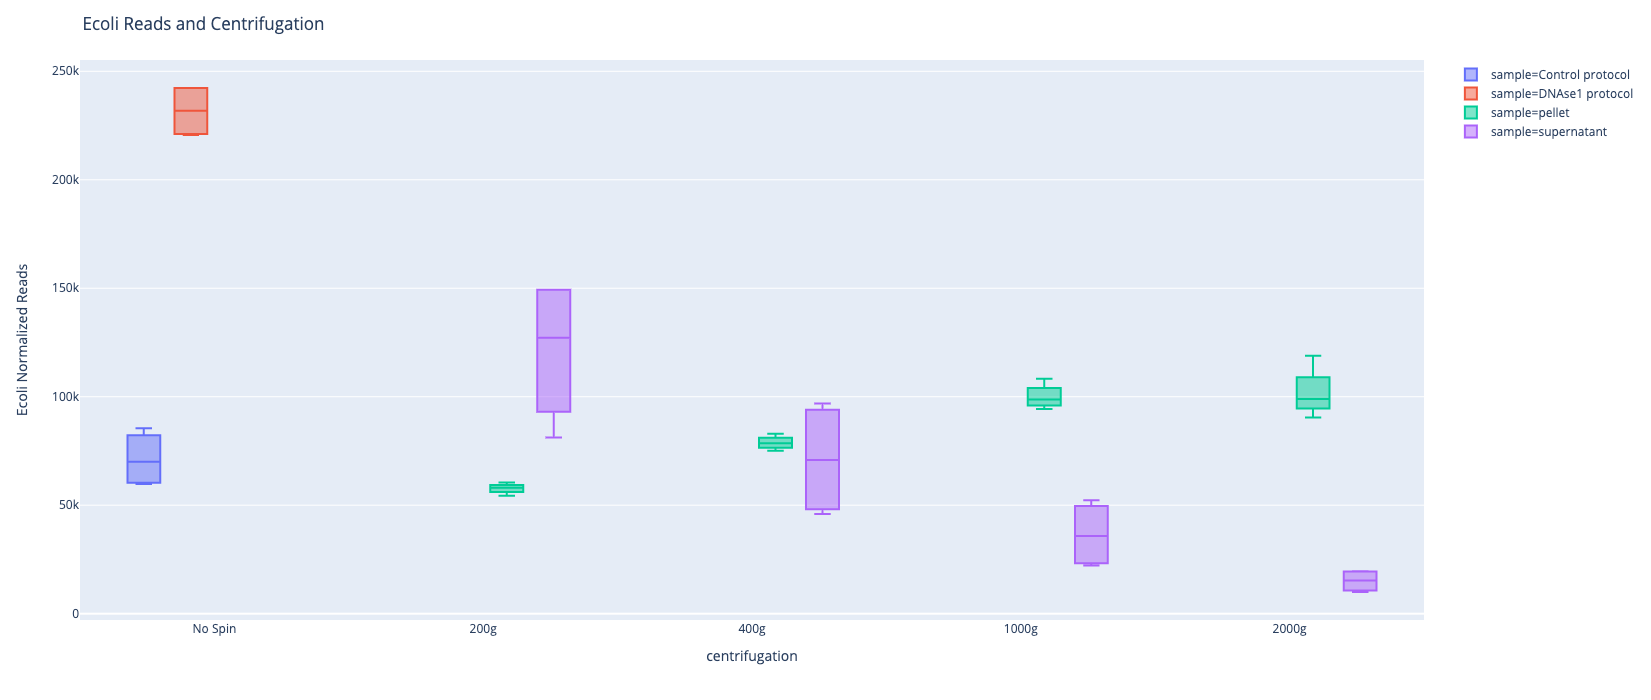

In [5]:
fig_t7 = px.box(merged, x='centrifugation', y='ecoli_normalized_reads', color='sample',
                 labels={'ecoli_normalized_reads': 'Ecoli Normalized Reads'})
fig_t7.update_layout(height=700, title='Ecoli Reads and Centrifugation')
fig_t7.show()

In [6]:
merged_melt = pd.melt(merged, value_vars=['ecoli_normalized_reads', 'Human'], id_vars='centrifugation',
                      value_name='Normalized reads')

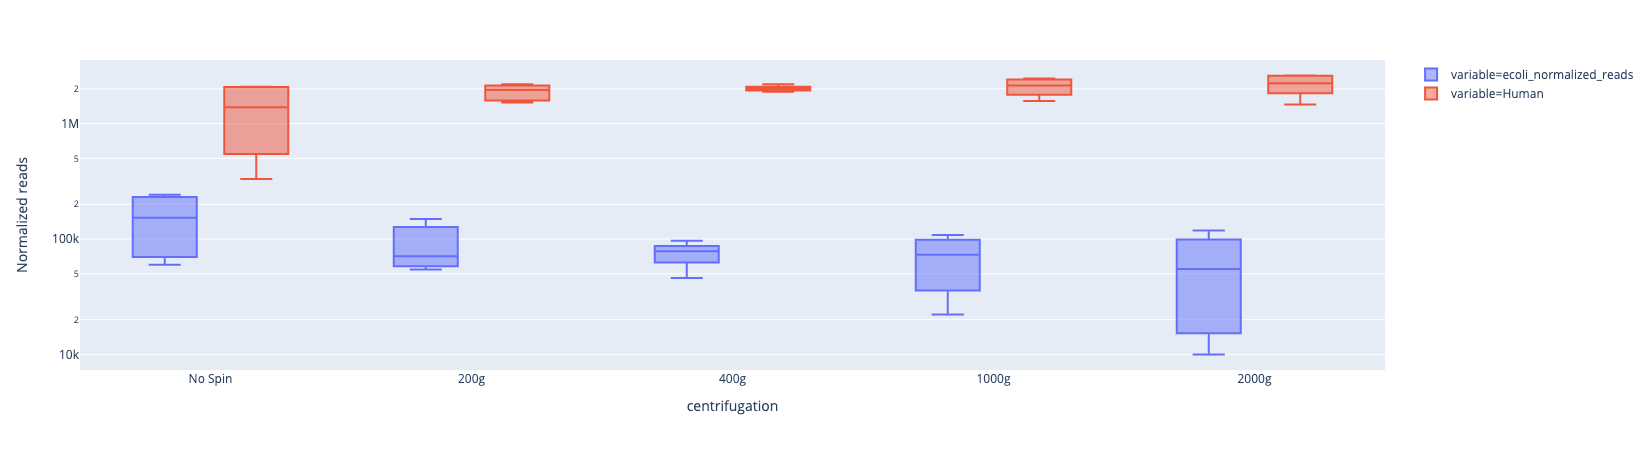

In [7]:
fig = px.box(merged_melt, x='centrifugation', y='Normalized reads', color='variable', log_y=True)
fig.show()

In [8]:
merged_melt2 = pd.melt(merged, value_vars=['Human', 'Bacteria', 'Virus', 'Unclassified'], id_vars='Description',
                      value_name='Normalized reads', var_name='Organism')
merged_melt2.head()

,Description,Organism,Normalized reads
0,"No Spin, Control protocol, Pool 3A",Human,2.070661e+06
1,"No Spin, Control protocol, Pool 3B",Human,2.075589e+06
2,"No Spin, Control protocol, Pool 4A",Human,2.008813e+06
3,"No Spin, Control protocol, Pool 4B",Human,2.084146e+06
4,"No Spin, DNAse1 protocol, Pool 3A",Human,3.310634e+05


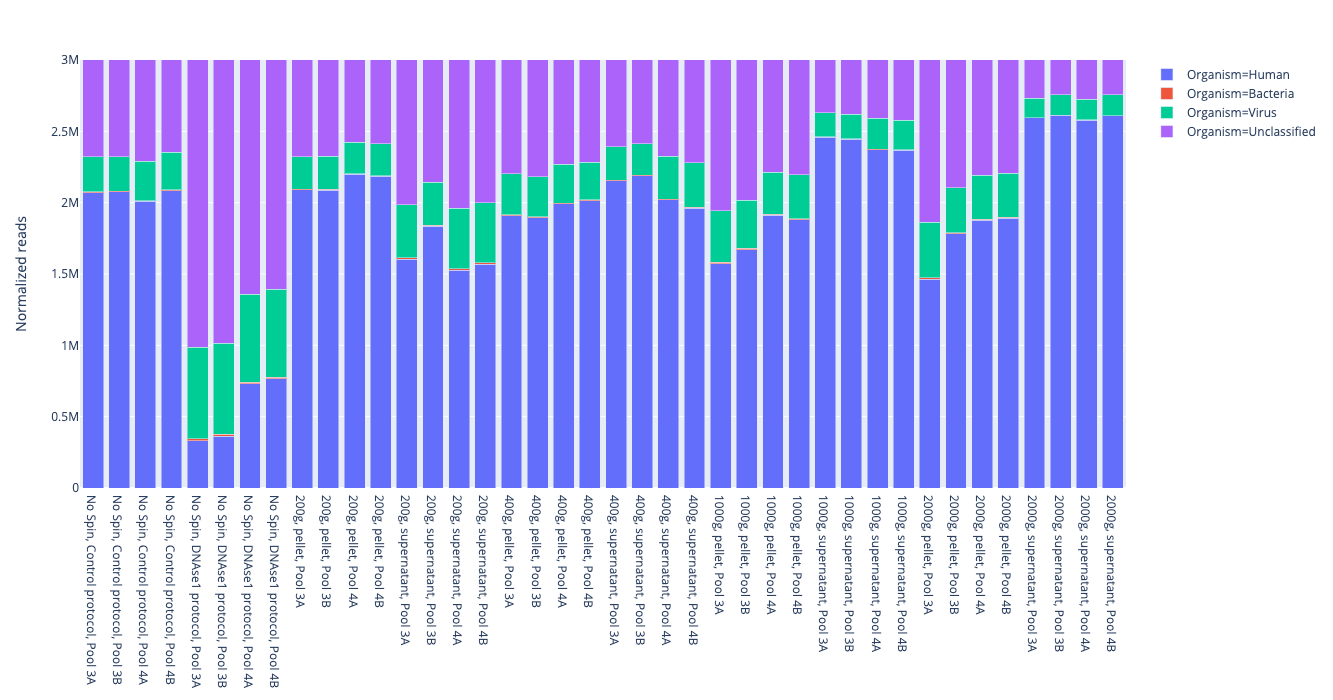

In [12]:
fig = px.bar(merged_melt2, x='Description', y='Normalized reads', color='Organism', barmode='stack')
fig.update_layout(xaxis_title=None, height=700)
fig.update_yaxes(range=[0, 3e6])
fig.show()